Supplier Clustering Model with Contract Termination Focus

Objective :
* The primary objective of this model is to identify patterns and groupings within your supplier data that correlate with contract termination. By clustering suppliers based on their characteristics and behaviors, we aim to discover which combinations of factors most strongly predict whether a supplier relationship will end.

Model Description:

This is a hybrid approach that combines:

* Unsupervised learning (clustering) to identify natural groupings in supplier data

* Supervised analysis by examining how these clusters relate to the "Contract Termination" target variable

In [67]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from ydata_profiling import ProfileReport

In [112]:
df=pd.read_csv(r"C:\Users\lynda\OneDrive\Desktop\BiPi\Final_versionML\Data_Externe_Used\supplier_data_renamed.csv")

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Supplier Performance Rating        15004 non-null  float64
 1   Last Supplier Assessment Score     15004 non-null  float64
 2   Number of Contracts                14999 non-null  float64
 3   Monthly Engagement Hours           15004 non-null  int64  
 4   Length of Relationship             14999 non-null  float64
 5   Supply Chain Incidents             15000 non-null  float64
 6   Contract Termination               15004 non-null  int64  
 7   Expanded Business in Last 5 Years  15004 non-null  int64  
 8   Cost Tier                          15004 non-null  object 
 9   Account Management Level           15004 non-null  int64  
 10  Supplier Category                  15004 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 1.3+ 

In [116]:
#afficher les 5 premières lignes du dataframe
df.head()


,Supplier Performance Rating,Last Supplier Assessment Score,Number of Contracts,Monthly Engagement Hours,Length of Relationship,Supply Chain Incidents,Contract Termination,Expanded Business in Last 5 Years,Cost Tier,Account Management Level,Supplier Category
0,0.38,0.53,2.0,157,3.0,0.0,1,0,low,31,bieres
1,0.80,0.86,5.0,262,6.0,0.0,1,0,medium,71,bieres
2,0.11,0.88,7.0,272,4.0,0.0,1,0,medium,8,bieres
3,0.72,0.87,5.0,223,5.0,0.0,1,0,low,68,bieres
4,0.37,0.52,2.0,159,3.0,0.0,1,0,low,48,bieres


In [115]:
df['Supplier Category'] = (
    df['Supplier Category']
    .str.normalize('NFKD')  # enlève accents
    .str.encode('ascii', errors='ignore')
    .str.decode('utf-8')
)


In [71]:
#calucler le nombre sont null de chaque colonne
df.isnull().sum()
#calculer le pourcentage de valeurs nulles de chaque colonne 
# print("********************************************")
# df.isnull().sum()/len(df)*100
# #calculer le nombre de valeurs uniques de chaque colonne
# df.nunique()



Supplier Performance Rating          0
Last Supplier Assessment Score       0
Number of Contracts                  5
Monthly Engagement Hours             0
Length of Relationship               5
Supply Chain Incidents               4
Contract Termination                 0
Expanded Business in Last 5 Years    0
Cost Tier                            0
Account Management Level             0
Supplier Category                    0
dtype: int64

In [72]:
df.nunique()

Supplier Performance Rating           92
Last Supplier Assessment Score        65
Number of Contracts                    6
Monthly Engagement Hours             215
Length of Relationship                 8
Supply Chain Incidents                 2
Contract Termination                   2
Expanded Business in Last 5 Years      2
Cost Tier                              3
Account Management Level             101
Supplier Category                     10
dtype: int64

In [117]:
df.columns =df.columns.str.strip()

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15004 entries, 0 to 15003
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Supplier Performance Rating        15004 non-null  float64
 1   Last Supplier Assessment Score     15004 non-null  float64
 2   Number of Contracts                14999 non-null  float64
 3   Monthly Engagement Hours           15004 non-null  int64  
 4   Length of Relationship             14999 non-null  float64
 5   Supply Chain Incidents             15000 non-null  float64
 6   Contract Termination               15004 non-null  int64  
 7   Expanded Business in Last 5 Years  15004 non-null  int64  
 8   Cost Tier                          15004 non-null  object 
 9   Account Management Level           15004 non-null  int64  
 10  Supplier Category                  15004 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 1.3+ 

<Axes: >

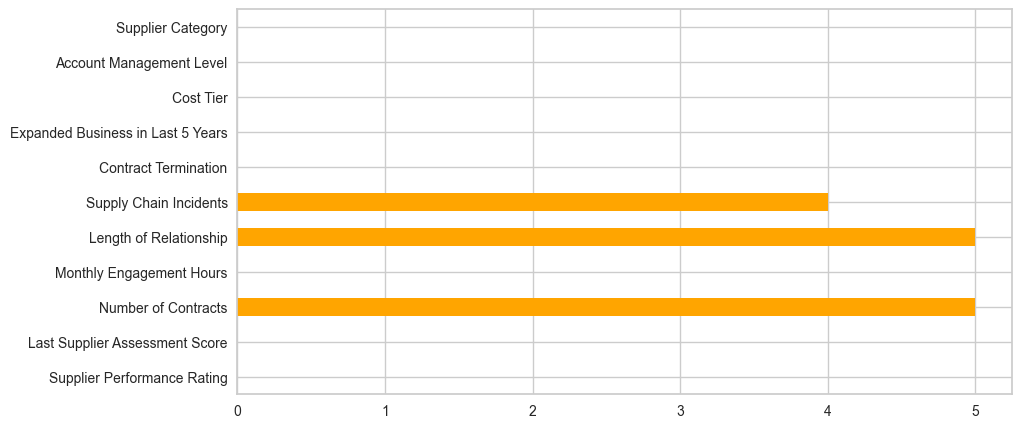

In [119]:
df.isnull().sum().plot(kind='barh', figsize=(10, 5), color='orange')

In [120]:
#drop the columns nulls
df=df.dropna(axis=0) 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Supplier Performance Rating        14999 non-null  float64
 1   Last Supplier Assessment Score     14999 non-null  float64
 2   Number of Contracts                14999 non-null  float64
 3   Monthly Engagement Hours           14999 non-null  int64  
 4   Length of Relationship             14999 non-null  float64
 5   Supply Chain Incidents             14999 non-null  float64
 6   Contract Termination               14999 non-null  int64  
 7   Expanded Business in Last 5 Years  14999 non-null  int64  
 8   Cost Tier                          14999 non-null  object 
 9   Account Management Level           14999 non-null  int64  
 10  Supplier Category                  14999 non-null  object 
dtypes: float64(5), int64(4), object(2)
memory usage: 1.4+ MB


In [121]:
df['Contract Termination'].value_counts()

Contract Termination
0    11428
1     3571
Name: count, dtype: int64

In [122]:
#who has cost Tier 
pd.crosstab(df['Cost Tier'], df['Supplier Category'],normalize='columns')

Supplier Category,bieres,boissons,conserves,epices,fruits secs,laitiers,legumes,produits laitiers,produits menagers,snacks
Cost Tier,,,,,,,,,,
high,0.064976,0.075388,0.063257,0.357143,0.096480,0.073897,0.060893,0.064803,0.067645,0.093240
low,0.507005,0.500000,0.514132,0.285714,0.466754,0.504412,0.453315,0.462516,0.496333,0.468531
medium,0.428019,0.424612,0.422611,0.357143,0.436767,0.421691,0.485792,0.472681,0.436023,0.438228


<Axes: xlabel='Supplier Performance Rating', ylabel='Cost Tier'>

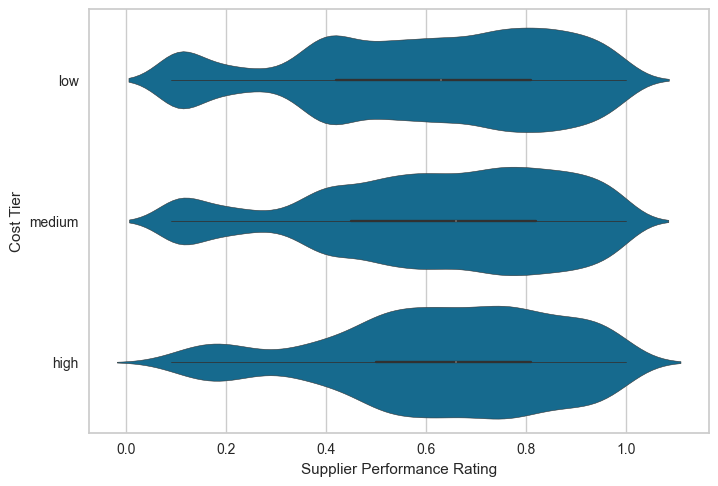

In [123]:
sns.violinplot(y=df['Cost Tier'], x=df['Supplier Performance Rating'])

In [124]:
df.columns

Index(['Supplier Performance Rating', 'Last Supplier Assessment Score',
       'Number of Contracts', 'Monthly Engagement Hours',
       'Length of Relationship', 'Supply Chain Incidents',
       'Contract Termination', 'Expanded Business in Last 5 Years',
       'Cost Tier', 'Account Management Level', 'Supplier Category'],
      dtype='object')

In [125]:
df =pd.get_dummies(df, columns=['Supplier Category'])
df.head()

,Supplier Performance Rating,Last Supplier Assessment Score,Number of Contracts,Monthly Engagement Hours,Length of Relationship,Supply Chain Incidents,Contract Termination,Expanded Business in Last 5 Years,Cost Tier,Account Management Level,Supplier Category_bieres,Supplier Category_boissons,Supplier Category_conserves,Supplier Category_epices,Supplier Category_fruits secs,Supplier Category_laitiers,Supplier Category_legumes,Supplier Category_produits laitiers,Supplier Category_produits menagers,Supplier Category_snacks
0,0.38,0.53,2.0,157,3.0,0.0,1,0,low,31,True,False,False,False,False,False,False,False,False,False
1,0.80,0.86,5.0,262,6.0,0.0,1,0,medium,71,True,False,False,False,False,False,False,False,False,False
2,0.11,0.88,7.0,272,4.0,0.0,1,0,medium,8,True,False,False,False,False,False,False,False,False,False
3,0.72,0.87,5.0,223,5.0,0.0,1,0,low,68,True,False,False,False,False,False,False,False,False,False
4,0.37,0.52,2.0,159,3.0,0.0,1,0,low,48,True,False,False,False,False,False,False,False,False,False


In [126]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder() 
df['Cost Tier']= label.fit_transform(df['Cost Tier'])
df.head()

,Supplier Performance Rating,Last Supplier Assessment Score,Number of Contracts,Monthly Engagement Hours,Length of Relationship,Supply Chain Incidents,Contract Termination,Expanded Business in Last 5 Years,Cost Tier,Account Management Level,Supplier Category_bieres,Supplier Category_boissons,Supplier Category_conserves,Supplier Category_epices,Supplier Category_fruits secs,Supplier Category_laitiers,Supplier Category_legumes,Supplier Category_produits laitiers,Supplier Category_produits menagers,Supplier Category_snacks
0,0.38,0.53,2.0,157,3.0,0.0,1,0,1,31,True,False,False,False,False,False,False,False,False,False
1,0.80,0.86,5.0,262,6.0,0.0,1,0,2,71,True,False,False,False,False,False,False,False,False,False
2,0.11,0.88,7.0,272,4.0,0.0,1,0,2,8,True,False,False,False,False,False,False,False,False,False
3,0.72,0.87,5.0,223,5.0,0.0,1,0,1,68,True,False,False,False,False,False,False,False,False,False
4,0.37,0.52,2.0,159,3.0,0.0,1,0,1,48,True,False,False,False,False,False,False,False,False,False


In [127]:
#create X and Y
X = df.drop(['Contract Termination'], axis=1)
y = df['Contract Termination']

In [128]:
#create the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

In [129]:
#Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
X_train_S = scaler.fit_transform(X_train)
X_test_S = scaler.transform(X_test)


In [130]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [131]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [132]:
y_pred = model.predict(X_test) 
model.predict_proba(X_test)

array([[0.99633138, 0.00366862],
       [0.99804619, 0.00195381],
       [0.99497659, 0.00502341],
       ...,
       [0.        , 1.        ],
       [0.99817718, 0.00182282],
       [0.        , 1.        ]])

In [133]:
accuracy = model.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.996


In [134]:
from sklearn.model_selection import cross_val_score

cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()

0.996221233469287

In [135]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[7994,    0],
       [  42, 2464]], dtype=int64)

rq: 7994 true negatives (TN): correctly predicted class 0

0 false positives (FP): incorrectly predicted class 1 when it's actually class 0

41 false negatives (FN): incorrectly predicted class 0 when it's actually class 1

2465 true positives (TP): correctly predicted class 1

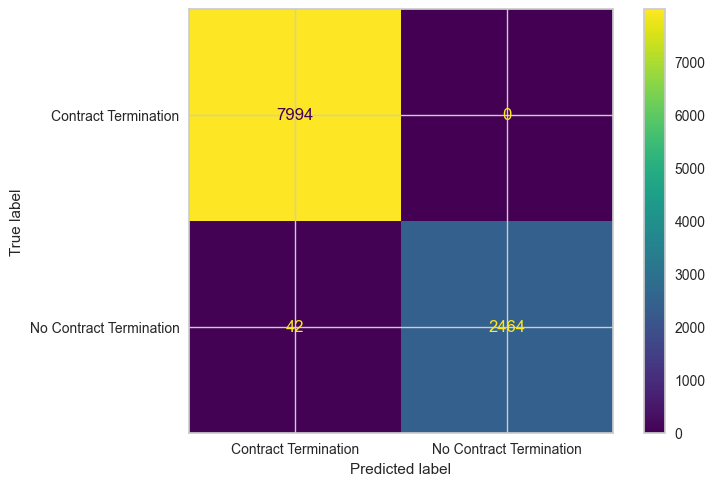

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Contract Termination', 'No Contract Termination']).plot()

In [141]:
coef_df= pd.DataFrame(zip(X.columns, model.coef_.flatten()), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

In [142]:
# Sauvegarder dans un fichier CSV
coef_df.to_csv('feture_coefficientsCluster.csv', index=False)

In [138]:
df.columns

Index(['Supplier Performance Rating', 'Last Supplier Assessment Score',
       'Number of Contracts', 'Monthly Engagement Hours',
       'Length of Relationship', 'Supply Chain Incidents',
       'Contract Termination', 'Expanded Business in Last 5 Years',
       'Cost Tier', 'Account Management Level', 'Supplier Category_bieres',
       'Supplier Category_boissons', 'Supplier Category_conserves',
       'Supplier Category_epices', 'Supplier Category_fruits secs',
       'Supplier Category_laitiers', 'Supplier Category_legumes',
       'Supplier Category_produits laitiers',
       'Supplier Category_produits menagers', 'Supplier Category_snacks'],
      dtype='object')

<Axes: xlabel='Account Management Level', ylabel='Density'>

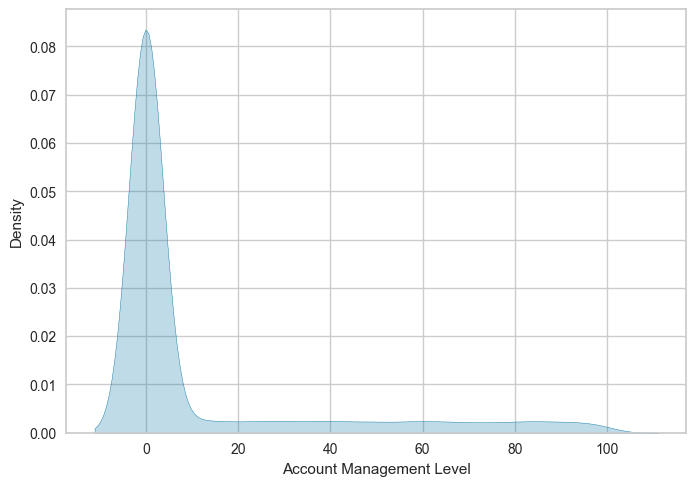

In [139]:
sns.kdeplot(df['Account Management Level'],shade=True)

In [140]:
import joblib

# Save the Model
joblib.dump(model, 'Suppliers_ClusterEnc.pkl')

['Suppliers_ClusterEnc.pkl']

In [103]:
# Predict and convert the result to a DataFrame
final_df = pd.DataFrame(model.predict(X_train))

# Display the first 20 rows
print(final_df.head(20))

# Save the DataFrame to a CSV file
final_df.to_csv('SupplierCluster.csv', index=False)

    0
0   1
1   0
2   0
3   0
4   0
5   0
6   1
7   0
8   0
9   0
10  0
11  1
12  0
13  0
14  0
15  0
16  0
17  0
18  1
19  0


In [104]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4499 entries, 0 to 4498
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4499 non-null   int64
dtypes: int64(1)
memory usage: 35.3 KB


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Supplier Performance Rating          14999 non-null  float64
 1   Last Supplier Assessment Score       14999 non-null  float64
 2   Number of Contracts                  14999 non-null  float64
 3   Monthly Engagement Hours             14999 non-null  int64  
 4   Length of Relationship               14999 non-null  float64
 5   Supply Chain Incidents               14999 non-null  float64
 6   Contract Termination                 14999 non-null  int64  
 7   Expanded Business in Last 5 Years    14999 non-null  int64  
 8   Cost Tier                            14999 non-null  int32  
 9   Account Management Level             14999 non-null  int64  
 10  Supplier Category_bières             14999 non-null  bool   
 11  Supplier Category_boissons       

In [109]:
# Renommer la colonne de prédiction pour qu'elle ait un nom clair
final_df = final_df.rename(columns={0: 'Predection_Label'})

# Concaténer les deux DataFrames côte à côte
result_df = pd.concat([df.reset_index(drop=True), final_df.reset_index(drop=True)], axis=1)

# Vérifier le résultat
print(result_df.head())

   Supplier Performance Rating  Last Supplier Assessment Score  \
0                         0.38                            0.53   
1                         0.80                            0.86   
2                         0.11                            0.88   
3                         0.72                            0.87   
4                         0.37                            0.52   

   Number of Contracts  Monthly Engagement Hours  Length of Relationship  \
0                  2.0                       157                     3.0   
1                  5.0                       262                     6.0   
2                  7.0                       272                     4.0   
3                  5.0                       223                     5.0   
4                  2.0                       159                     3.0   

   Supply Chain Incidents  Contract Termination  \
0                     0.0                     1   
1                     0.0                   

In [110]:
result_df.head()

,Supplier Performance Rating,Last Supplier Assessment Score,Number of Contracts,Monthly Engagement Hours,Length of Relationship,Supply Chain Incidents,Contract Termination,Expanded Business in Last 5 Years,Cost Tier,Account Management Level,Supplier Category,Predection_Label
0,0.38,0.53,2.0,157,3.0,0.0,1,0,low,31,bières,1.0
1,0.80,0.86,5.0,262,6.0,0.0,1,0,medium,71,bières,0.0
2,0.11,0.88,7.0,272,4.0,0.0,1,0,medium,8,bières,0.0
3,0.72,0.87,5.0,223,5.0,0.0,1,0,low,68,bières,0.0
4,0.37,0.52,2.0,159,3.0,0.0,1,0,low,48,bières,0.0


In [111]:
# Sauvegarder en CSV
result_df.to_csv('SupplierFullDataWithCluster.csv', index=False)